In [351]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tools import *
from optimization import *

plt.rcParams.update({'font.size': 14})

def annealing(num_iterations, cities, T0, alpha, cooling_schedule):
    distances = np.zeros(num_iterations)
    current_itinerary = np.array(range(len(cities)))
    current_length = itinerary_cost(current_itinerary, cities)
    Tcurr = T0
    for step in range(num_iterations):
            current_itinerary, current_length, Tcurr = simulated_annealing_step(cities, current_itinerary, Tcurr, T0, alpha, step, cooling_schedule)
            distances[step] = current_length
    return distances

# SKYRIM

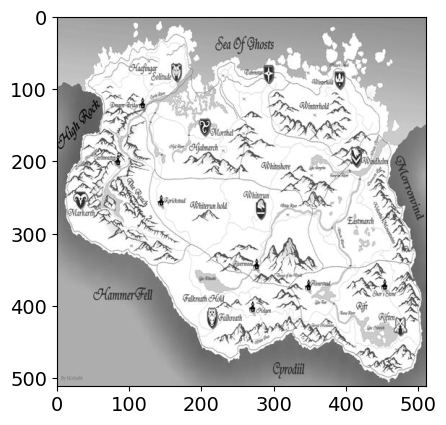

In [316]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("figures/skyrim.jpeg")
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

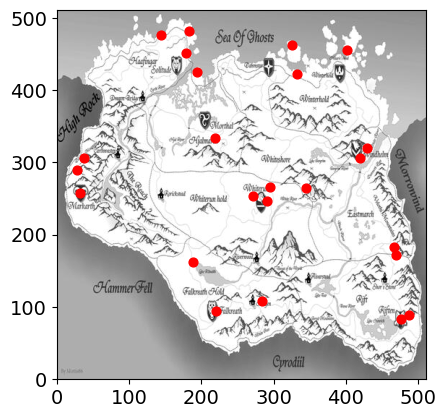

In [320]:
im = plt.imread("figures/skyrim.jpeg")
# We will load the image but plot it upside down
im_flipped = np.flipud(im)
implot = plt.imshow(im_flipped, origin='lower', cmap='gray')

x = np.array([32,28,37,144,183,179,194,219,188,220,284,291,272,295,345,332,325,401,420,429,467,470,476,487])
y = 512-np.array([255,223,206,36,30,61,87,178,350,418,404,266,259,246,248,90,50,56,206,192,329,341,429,424])
# put a red dot, size 40, at 2 locations:
plt.scatter(x, y, c='r', s=40)
plt.show()

In [327]:
# Normalie distances
x_norm = x/512
y_norm = y/512

# Define paremetrs for optimization
np.random.seed(42) 
num_iterations = 5000
alpha = 300
T0 = 100
cooling_schedule = cooling_logarithmic_m
cities = np.array([x_norm, y_norm]).T
np.random.shuffle(cities) 
N = len(cities)

# initial contitions
current_itinerary = np.array(range(N))
current_length = itinerary_cost(current_itinerary, cities)
Tcurr = T0
distances = np.zeros(num_iterations)

for i in range(num_iterations):
        current_itinerary, current_length, Tcurr = simulated_annealing_step(cities, current_itinerary, Tcurr, T0, alpha, i, cooling_schedule)
        distances[i] = current_length



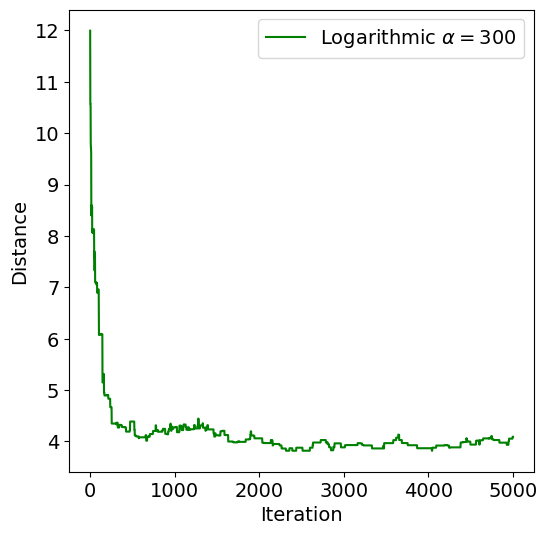

In [352]:
plt.figure(figsize=(6,6))
plt.plot(distances, color = 'green', label = fr'Logarithmic $\alpha=${alpha}')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()
plt.show()


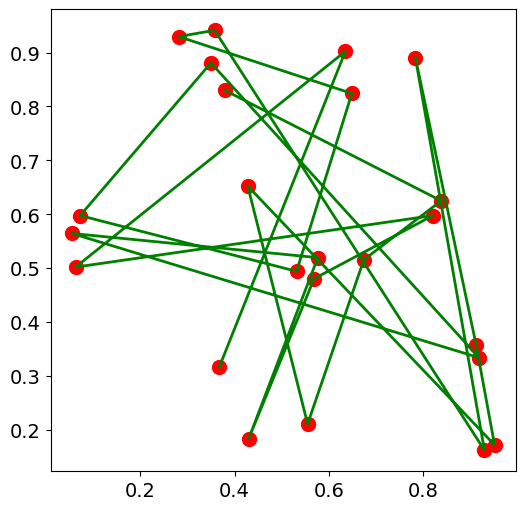

In [359]:
# Now let's plot the final itinerary and scale it back to the original image
plt.figure(figsize=(6,6))
plt.plot(cities[np.array(range(N))][:,0], cities[np.array(range(N))][:,1], color = 'green', linewidth=2)
plt.scatter(cities[np.array(range(N))][:,0], cities[np.array(range(N))][:,1], color = 'red', s=100)

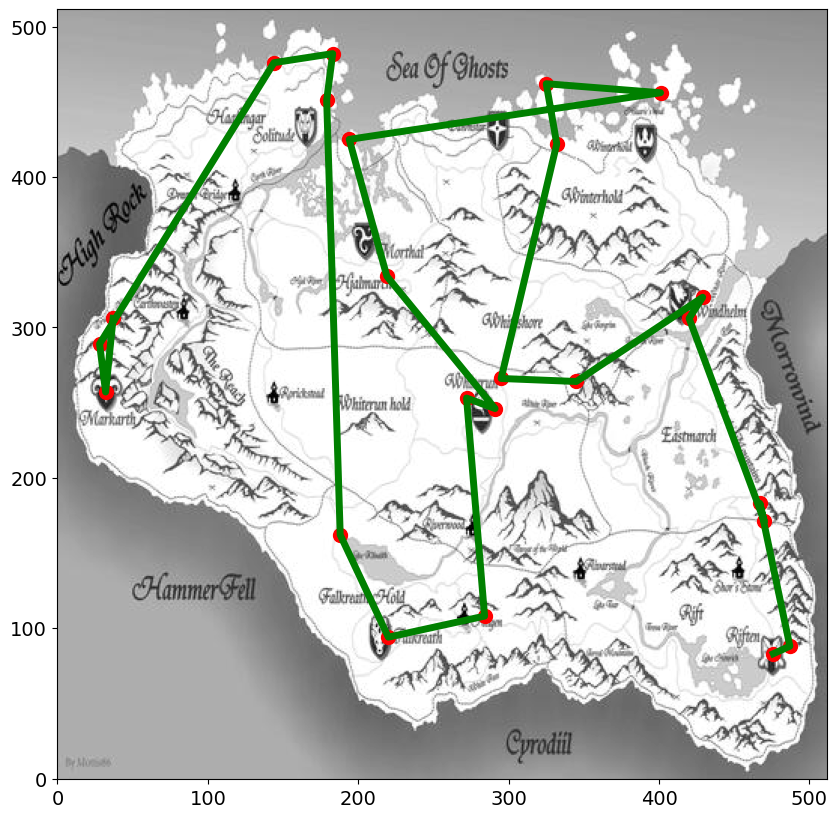

In [347]:
# Now let's plot the final itinerary and scale it back to the original image
plt.figure(figsize=(10, 10))
plt.plot(512*cities[current_itinerary][:,0], 512*cities[current_itinerary][:,1], color = 'green', linewidth=5)
plt.scatter(512*cities[current_itinerary][:,0], 512*cities[current_itinerary][:,1], color = 'red', s=100)
plt.imshow(im_flipped, origin='lower', cmap='gray')

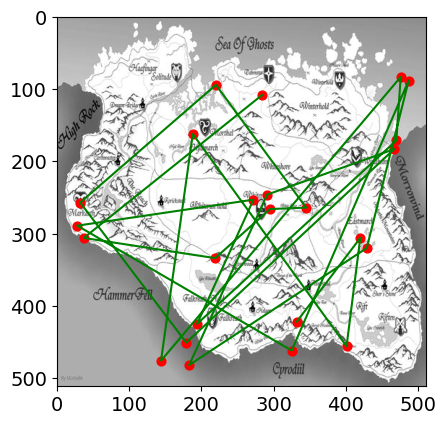

In [336]:
# Now let's put the map of skyrim in the background
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.scatter(x, y, c='r', s=40)
plt.plot(x[current_itinerary], y[current_itinerary], c='g')
plt.show()


# Introduction

## Polygone

In [ ]:
# We plot a polygone using our function
N = 9
points = regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))
plt.figure()
plt.scatter(points[:, 0], points[:, 1], c='r')
plt.plot(points[:, 0], points[:, 1], c='k')
plt.xlim(0, 1)
plt.ylim(0, 1)
# force aspect ratio 1
plt.gca().set_aspect('equal', adjustable='box')
# make numbers bigger
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Norm comparison

In [ ]:
# let us import time it function
from timeit import timeit

# Let's compare all three costs for sets of 10 cities, but they calculate the cost M times
N = 20
M = [10**i for i in range(1, 6)]

# Create points
points = np.random.rand(N, 2)

points_spherical = np.zeros((N, 2))
points_spherical[:, 0] = np.arccos(2 * np.random.rand(N) - 1)
points_spherical[:, 1] = np.random.rand(N) * 2 * np.pi


euclidean_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_euclidean(points)
    end = time.time()
    euclidean_runtime[i] = end - start

taxicab_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_taxicab(points)
    end = time.time()
    taxicab_runtime[i] = end - start

spherical_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_spherical(points_spherical)
    end = time.time()
    spherical_runtime[i] = end - start


In [ ]:
plt.figure(figsize=(5,5))
plt.plot(M, euclidean_runtime, label='Euclidean', color = 'k')
plt.plot(M, taxicab_runtime, label='Taxicab', color = 'r')
plt.plot(M, spherical_runtime, label='Spherical', color = 'g')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.xscale('log')
plt.legend()
plt.show()

## Temperature behaviour

# Methodology

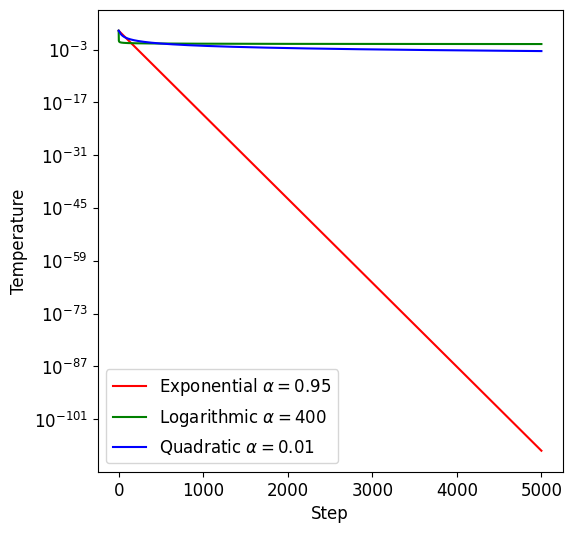

In [294]:
from optimization import *
# Let us plot all cooling schedules
T0 = 100
schedules = [cooling_exponential_m, cooling_logarithmic_m, cooling_quadratic_m]
names = ['Exponential', 'Logarithmic', 'Quadratic']
colorsav = ['red', 'green', 'blue']
colors = ['lightcoral', 'lightgreen', 'lightblue']
alphas = [0.95, 400, 0.01]
num_steps = 5000
exponential = np.array([cooling_exponential_m(T0, alphas[0], step) for step in range(num_steps)])
logarithmic = np.array([cooling_logarithmic_m(T0, alphas[1], step) for step in range(num_steps)])
quadratic = np.array([cooling_quadratic_m(T0, alphas[2], step) for step in range(num_steps)])
# Now normalize so that the first point is 1 and the last one is 0

plt.figure(figsize=(6,6))
# Plot against step percentage
x = np.array(range(num_steps))
plt.plot(x, exponential, label=fr'{names[0]} $\alpha=${alphas[0]}', color = colorsav[0])
plt.plot(x, logarithmic, label=fr'{names[1]} $\alpha=${alphas[1]}', color = colorsav[1])
plt.plot(x, quadratic, label=fr'{names[2]} $\alpha=${alphas[2]}', color = colorsav[2])
#also labels

plt.xlabel('Step')
plt.ylabel('Temperature')
plt.yscale('log')
plt.legend()
plt.show()


1


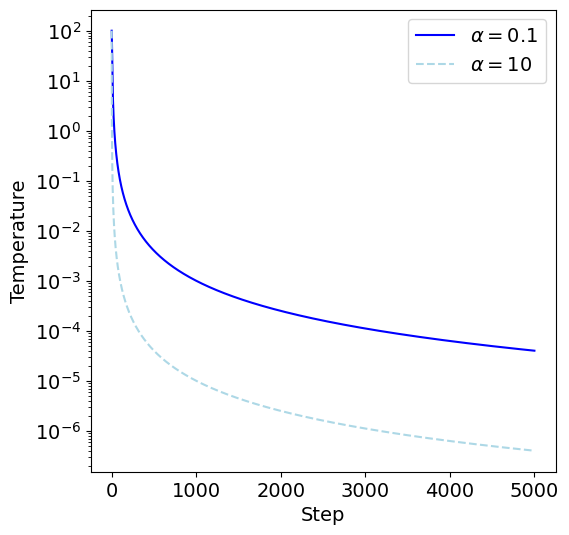

In [312]:
k=2
alphas = [[0.9, 300, 10],[0.99, 50, 0.1]]
slow = 1
fast = 0
num_steps = 5000
cool = schedules[k]

slow_plot = np.array([cool(T0, alphas[slow][k], step) for step in range(num_steps)])
fast_plot = np.array([cool(T0, alphas[fast][k], step) for step in range(num_steps)])
print(slow)
# Now plot the same but with different alpha values

plt.figure(figsize=(6,6))
x = np.array(range(num_steps))
plt.plot(x, slow_plot, label=fr'$\alpha=${alphas[slow][k]}', color = colorsav[k])
plt.plot(x, fast_plot, label=fr'$\alpha=${alphas[fast][k]}', color = colors[k], linestyle='--')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.yscale('log')
plt.legend()
plt.show()





# Analysis

In [290]:
    alphas = [[0.9, 300, 2],[0.99, 50, 0.3]]
    slow = 1
    fast = 0
    alpha = alphas[0][slow]

2

[]